## Deep Neural Network for MNIST Dataset

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow.keras as keras
from warnings import filterwarnings
filterwarnings("ignore")

2021-11-11 11:18:15.609394: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-11 11:18:15.609419: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Loading MNIST dataset from keras

In [2]:
mnist = keras.datasets.mnist.load_data()

In [3]:
(train_x_all, train_y), (test_x_all, test_y) = mnist
print(f'Shape of training data = {train_x_all.shape}')
print(f'Shape of testing data = {test_x_all.shape}')

Shape of training data = (60000, 28, 28)
Shape of testing data = (10000, 28, 28)


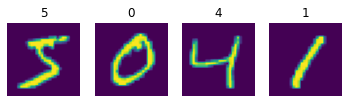

In [5]:
fig, ax =  plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(train_x_all[i])
    ax[i].set_title(train_y[i])
    ax[i].axis('off')
    

In [6]:
train_x = train_x_all/255.0
test_x =  test_x_all/255.0

In [7]:
model = keras.Sequential(name='mnist')
model.add(keras.layers.Flatten(input_shape=[28, 28], name='Input'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax, name="Output"))
model.summary()

Model: "mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


2021-11-11 11:18:30.897962: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-11 11:18:30.898002: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-11 11:18:30.898026: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ajay-pc): /proc/driver/nvidia/version does not exist
2021-11-11 11:18:30.898269: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Weights and Bias of a layer

In [8]:
layer = model.layers[1]
weights, biases = layer.get_weights()
print("Layer_name:", layer.name)
print("Weights:", weights)
print("Biases:", biases)

Layer_name: dense
Weights: [[-0.05798671 -0.06895332  0.04718959 ...  0.03059975 -0.03642075
  -0.04417598]
 [-0.01540481 -0.04965516  0.0754829  ... -0.07455505 -0.04795964
  -0.03358974]
 [-0.02240572  0.01247112 -0.07137351 ... -0.05446515 -0.04533474
  -0.02163418]
 ...
 [-0.03172852  0.08316622  0.0774757  ...  0.07969113 -0.03901316
  -0.0857258 ]
 [ 0.02518184 -0.01061662 -0.07440273 ...  0.07520888  0.07148368
   0.0551041 ]
 [-0.02410092 -0.0261214   0.06071661 ... -0.03541164 -0.02638111
   0.0662254 ]]
Biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


#### Compiling and training model

In [9]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = 'sgd', metrics=['accuracy'])

In [13]:
history = model.fit(train_x, train_y, epochs=30, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/30
1500/1500 [==============================] - 1s 887us/step - loss: 0.0800 - accuracy: 0.9778 - val_loss: 0.1164 - val_accuracy: 0.9670
Epoch 2/30
1500/1500 [==============================] - 1s 869us/step - loss: 0.0791 - accuracy: 0.9778 - val_loss: 0.1159 - val_accuracy: 0.9672
Epoch 3/30
1500/1500 [==============================] - 1s 882us/step - loss: 0.0782 - accuracy: 0.9783 - val_loss: 0.1134 - val_accuracy: 0.9672
Epoch 4/30
1500/1500 [==============================] - 1s 880us/step - loss: 0.0773 - accuracy: 0.9786 - val_loss: 0.1137 - val_accuracy: 0.9672
Epoch 5/30
1500/1500 [==============================] - 1s 887us/step - loss: 0.0763 - accuracy: 0.9786 - val_loss: 0.1134 - val_accuracy: 0.9672
Epoch 6/30
1500/1500 [==============================] - 1s 889us/step - loss: 0.0756 - accuracy: 0.9793 - val_loss: 0.1133 - val_accuracy: 0.9671
Epoch 7/30
1500/1500 [==============================] - 1s 893us/step - loss: 0.0746 - accuracy: 0.9796 - val_loss: 0.1134 -

In [14]:
np.shape(train_x)

(60000, 28, 28)

In [17]:
logs = pd.DataFrame(history.history)
logs.head()

,loss,accuracy,val_loss,val_accuracy
0,0.079986,0.977813,0.116387,0.967000
1,0.079131,0.977833,0.115919,0.967167
2,0.078214,0.978312,0.113379,0.967167
3,0.077309,0.978562,0.113710,0.967167
4,0.076336,0.978625,0.113430,0.967167


<AxesSubplot:>

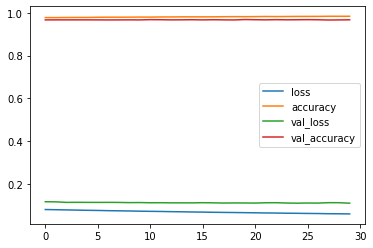

In [18]:
logs.plot()